In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
data = pd.read_csv('train.csv')

# Feature selection
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
features['TotalBath'] = features['FullBath'] + 0.5 * features['HalfBath']
features = features[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
target = data['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f'MAE: {mae}, MSE: {mse}, R-squared: {r2}')


MAE: 36569.64442787399, MSE: 2848523443.419101, R-squared: 0.6286307301050608


<ipython-input-2-87dfb9a22ccd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TotalBath'] = features['FullBath'] + 0.5 * features['HalfBath']


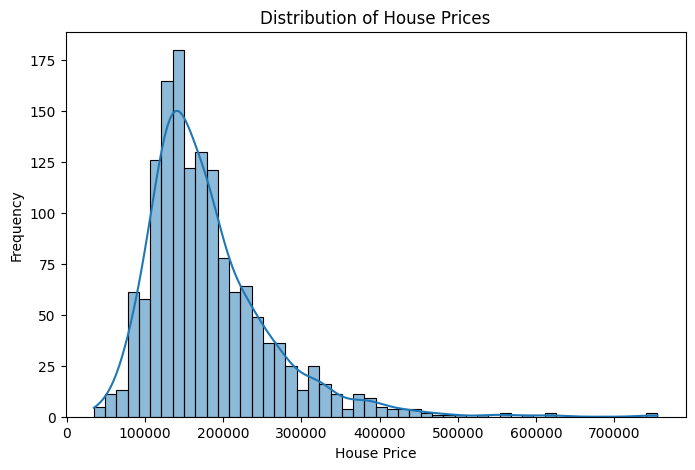

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('train.csv')

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], bins=50, kde=True)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


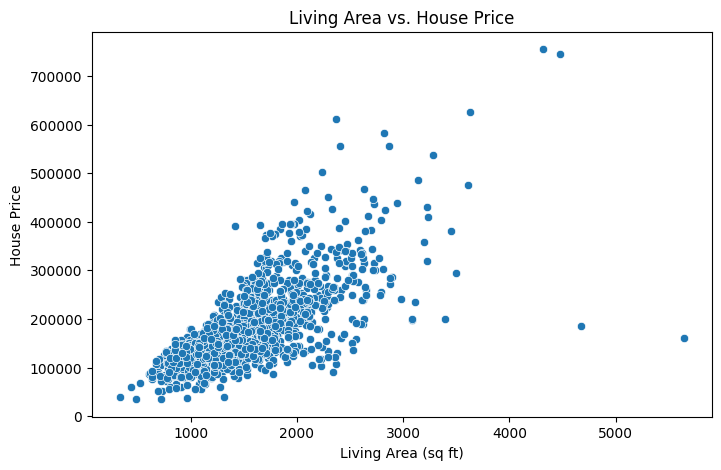

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.xlabel('Living Area (sq ft)')
plt.ylabel('House Price')
plt.title('Living Area vs. House Price')
plt.show()


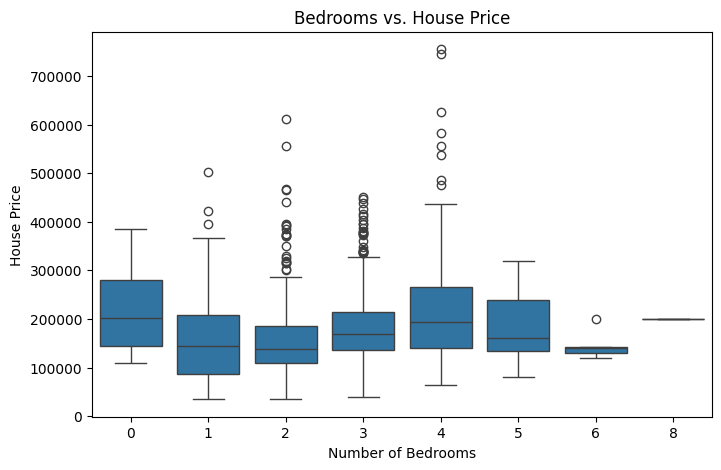

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Bedrooms vs. House Price')
plt.show()


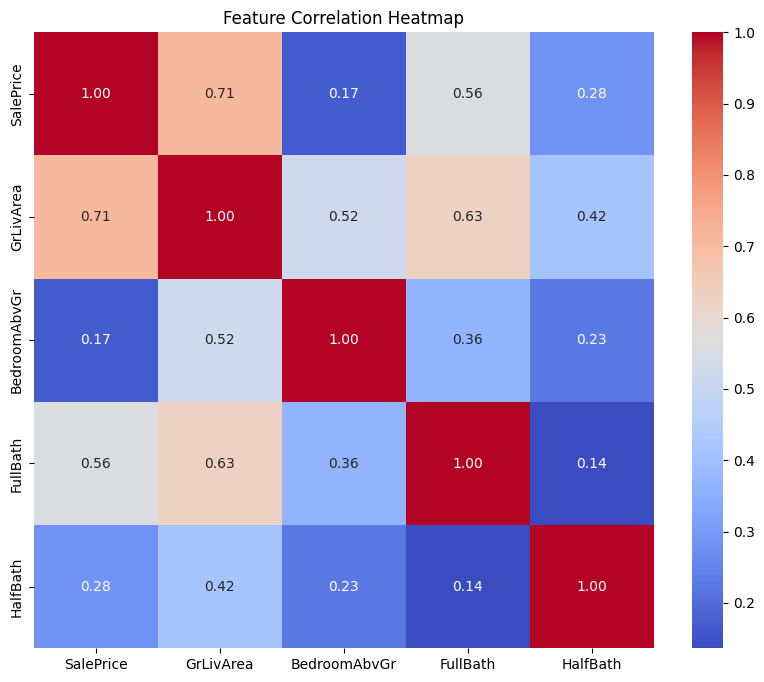

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


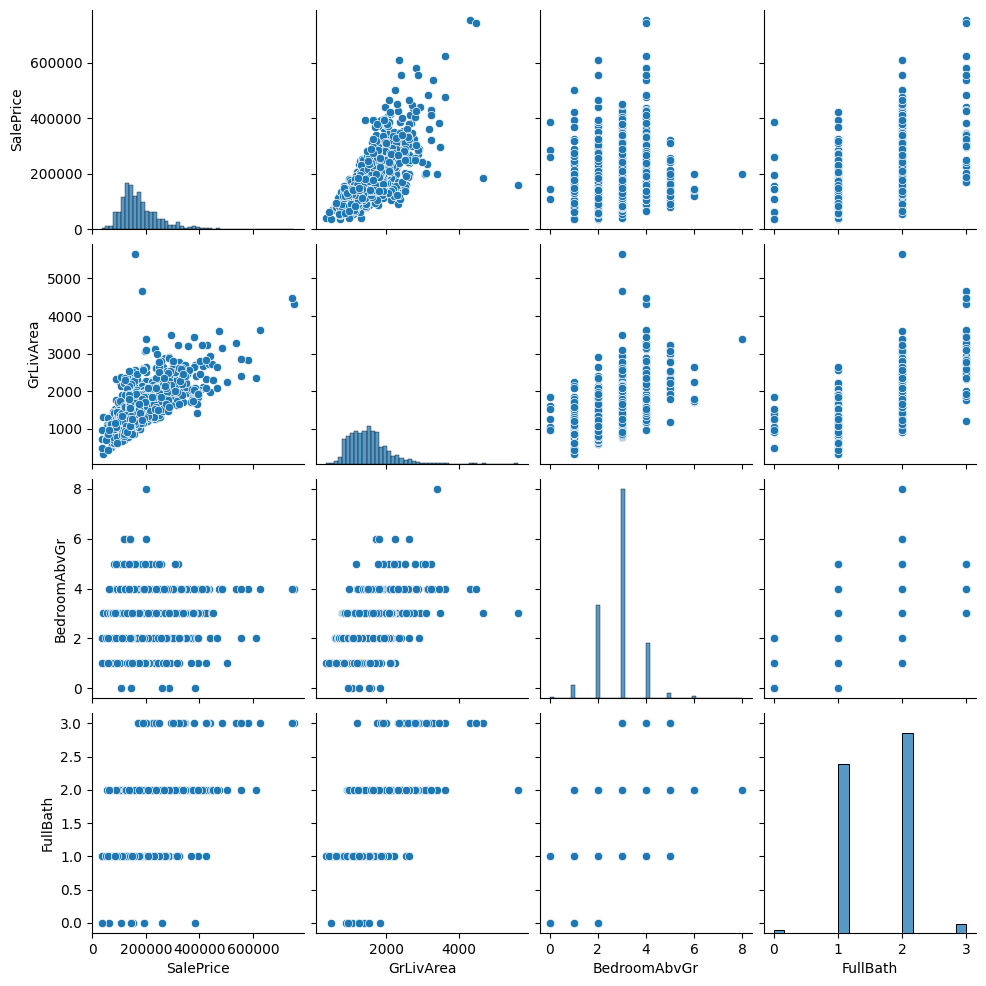

In [7]:
sns.pairplot(data[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']])
plt.show()
